# Importando os dados

In [1]:
import pandas as pd #lib para o df
import os # lib para manipulação de arquivos e diretórios
import matplotlib.pyplot as plt #lib de visualização
import cv2 # lib para processamento de imagens
from sklearn.model_selection import train_test_split
import numpy as np # lib para a estrutura de array
import tensorflow as tf # lib para construção da rede neural
from keras.applications.vgg16 import VGG16 # importa a rede neural convolucional através da API de auto nível keras
from tensorflow.keras.models import * # importa as funcionalidades do keras e o sequential
from tensorflow.keras.layers import * # importa as funcionalidades a nivel de arquitetura
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report #métricas de avaliação do modelo

In [2]:
imagens = "C:/Users/Maiara/OneDrive/all_resized_into_sub_folders_640/"

In [3]:
#definição dos rótulos

rotulos = [
    
    "White rook",
    "White king",
    "White knight",
    "White pawn",
    "White queen",
    "Black pawn",
    "Black queen",
    "Black rook",
    "White bishop",
    "Black bishop",
    "Black king",
    "Black knight"
    
]

In [4]:
# criando uma função para listar os caminhos dos arquivos e adicionar os rótulos

lista_img = []
lista_rotulo = []
for label in rotulos:
    for img_file in os.listdir(imagens+label):
        lista_img.append(imagens+label+'/'+img_file)
        lista_rotulo.append(label)
        
df = pd.DataFrame({'img':lista_img, 'rótulo':lista_rotulo})
df

,img,rótulo
0,C:/Users/Maiara/OneDrive/all_resized_into_sub_...,White rook
1,C:/Users/Maiara/OneDrive/all_resized_into_sub_...,White rook
2,C:/Users/Maiara/OneDrive/all_resized_into_sub_...,White rook
3,C:/Users/Maiara/OneDrive/all_resized_into_sub_...,White rook
4,C:/Users/Maiara/OneDrive/all_resized_into_sub_...,White rook
...,...,...
295,C:/Users/Maiara/OneDrive/all_resized_into_sub_...,Black knight
296,C:/Users/Maiara/OneDrive/all_resized_into_sub_...,Black knight
297,C:/Users/Maiara/OneDrive/all_resized_into_sub_...,Black knight
298,C:/Users/Maiara/OneDrive/all_resized_into_sub_...,Black knight


In [5]:
#verificando a quantidade de imagens de cada classe

df['rótulo'].value_counts()

rótulo
White rook      25
White king      25
White knight    25
White pawn      25
White queen     25
Black pawn      25
Black queen     25
Black rook      25
White bishop    25
Black bishop    25
Black king      25
Black knight    25
Name: count, dtype: int64

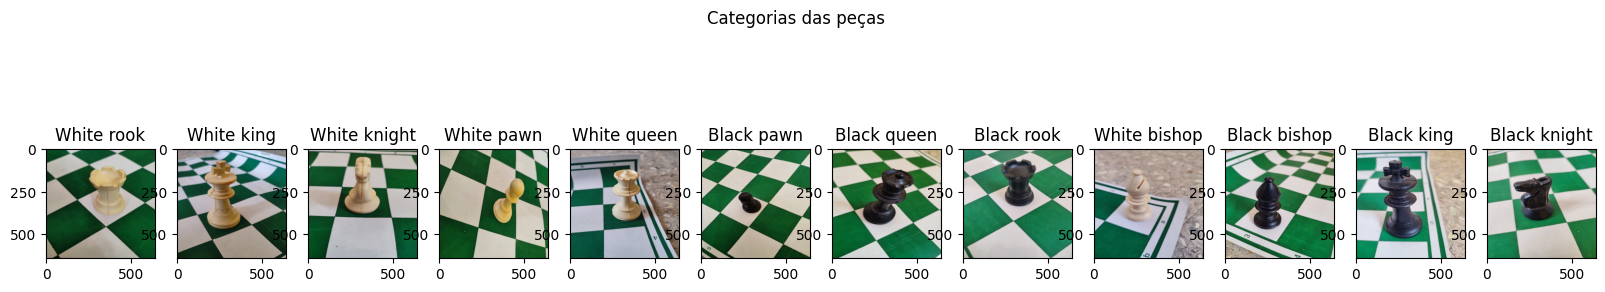

In [6]:
# plotando um exemplo de cada imagem

fig, ax = plt.subplots(ncols=len(rotulos), figsize=(20,4))
fig.suptitle('Categorias das peças')
random_num = 12
for i,label in enumerate(rotulos):
    ax[i].set_title(label)
    ax[i].imshow(plt.imread(df[df['rótulo']==label]
['img'].iloc[random_num]))

In [7]:
#diensões das imagens

plt.imread(df['img'][0]).shape

(640, 640, 3)

In [8]:
# adicionando um rótulo numérico para cada classe
rotulos_df = {
    
    "White rook" : 0,
    "White king" : 1,
    "White knight" : 2,
    "White pawn" : 3,
    "White queen" : 4,
    "Black pawn" : 5,
    "Black queen" : 6,
    "Black rook" : 7,
    "White bishop" : 8,
    "Black bishop" : 9,
    "Black king" : 10,
    "Black knight" : 11
}
# Encode
df['código'] = df['rótulo'].map(rotulos_df)
df.head()

,img,rótulo,código
0,C:/Users/Maiara/OneDrive/all_resized_into_sub_...,White rook,0
1,C:/Users/Maiara/OneDrive/all_resized_into_sub_...,White rook,0
2,C:/Users/Maiara/OneDrive/all_resized_into_sub_...,White rook,0
3,C:/Users/Maiara/OneDrive/all_resized_into_sub_...,White rook,0
4,C:/Users/Maiara/OneDrive/all_resized_into_sub_...,White rook,0


In [9]:
# definindo os parametros das imagens
image_width = 160
image_height = 160
image_color_channel = 3 # definindo canais de cor como RGB 
image_color_channel_size = 255 # tamanho máximo que cada canal de cor pode ter
image_size = (image_width, image_height) # tupla que armazena as dimensões da imagem
image_shape = image_size + (image_color_channel,) # tupla que combina as dimensões da imagem com o número de canais de cor. 

X = []
for img in df['img']:
    img = cv2.imread(str(img))
    img = cv2.resize(img, image_size)  # Usando image_size
    img = img / image_color_channel_size  # Usando image_color_channel_size
    X.append(img)

# Agora, cada imagem em X terá as dimensões corretas e 3 canais de cores.

In [10]:
y = df['código'] # variável target

In [11]:
# divisão em treino, teste e validação

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.2, random_state=0)

In [12]:
# cria a rede com as config de imagens definidas anteriormente que será treinada na base de dados imagenet
#porém a última camada (camada de saída) não será adicionada pois estamos interessados apenas nas camadas convolucionais e de pooling

base_model = VGG16(input_shape=image_shape, include_top=False, weights='imagenet')

base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 160, 160, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 160, 160, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 80, 80, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 80, 80, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 80, 80, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 40, 40, 128)       0     

In [13]:
# ajustes finos

for layer in base_model.layers: # percorre todas as camadas do modelo base
    layer.trainable = False # as camadas do modelo base não serão treinadas novamente durante o processo de treinamento no novo conjunto de dados.
#  a segunda, terceira e quarta camadas a partir do final (ou seja, as camadas densas a partir do final) serão treináveis
base_model.layers[-2].trainable = True 
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

In [14]:
len(rotulos)

12

In [15]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=image_shape), # aplica um flip horizontal aleatório (espelhamento) às imagens.
        layers.RandomRotation(0.1), # aplica uma rotação aleatória às imagens. O argumento 0.1 indica que a rotação será aleatória entre -0.1 e +0.1 vezes o ângulo original introduzindo uma pequena variação nas orientações das imagens.
        layers.RandomZoom(0.1), # aplica um zoom aleatório às imagens. 
        #O argumento 0.1 indica que o zoom será aleatório entre 90% e 110% do tamanho original da imagem simulando diferentes distâncias da câmera ou tamanhos de objetos nas imagens.
    ]
)

In [16]:
model = Sequential() # cria um modelo de rede neural sequencial vazio
model.add(data_augmentation) #aplicação do data_augmentation nos dados de entrada
model.add(Input(shape=(160,160,3))) #  adiciona uma camada de entrada à rede
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))# adiciona o modelo base_model que foi definido anteriormente ao modelo sequencial.
model.add(Dense(len(rotulos), activation='softmax'))# cria uma camada densa com 256 unidades neurais e aplica a função sigmoid a cada unidade para gerar uma saída de probabilidade para cada classe.
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 input_2 (InputLayer)        multiple                  0         
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                      

Problema: Data cardinality is ambiguous: Make sure all arrays contain the same number of samples Tensorflow
Solução: https://stackoverflow.com/questions/68265535/data-cardinality-is-ambiguous-make-sure-all-arrays-contain-the-same-number-of-s

In [17]:
# mudança nas estruturas em arrays NumPy bidimensionais.

X_train = np.stack(X_train, axis=0)
X_val = np.stack(X_val, axis=0) 

In [21]:
# codificação one-hot
y_train_one_hot = to_categorical(y_train, num_classes=12) #apliação do one hot encoding
y_val_one_hot = to_categorical(y_val, num_classes=12)

# definições do modelo
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002), # otimizador e tamanho dos passos para a convergência do modelo
    loss=tf.keras.losses.categorical_crossentropy, # calcula a entropia cruzada entre as distribuições de probabilidade previstas e as distribuições one-hot dos rótulos reais.
    metrics=['acc'] #metrica que sera acompanhada
)

# dados de treino, validações e quantidade de iterações
history = model.fit(X_train, y_train_one_hot, epochs=26, validation_data=(X_val, y_val_one_hot))

Epoch 1/26
8/8 [==============================] - 16s 2s/step - loss: 0.6201 - acc: 0.8208 - val_loss: 0.6027 - val_acc: 0.8333
Epoch 2/26
8/8 [==============================] - 14s 2s/step - loss: 0.3616 - acc: 0.8833 - val_loss: 0.7151 - val_acc: 0.6667
Epoch 3/26
8/8 [==============================] - 13s 2s/step - loss: 0.1439 - acc: 0.9625 - val_loss: 0.3157 - val_acc: 0.8333
Epoch 4/26
8/8 [==============================] - 14s 2s/step - loss: 0.1322 - acc: 0.9500 - val_loss: 0.2887 - val_acc: 0.8333
Epoch 5/26
8/8 [==============================] - 14s 2s/step - loss: 0.1413 - acc: 0.9500 - val_loss: 0.1898 - val_acc: 0.9167
Epoch 6/26
8/8 [==============================] - 14s 2s/step - loss: 0.1400 - acc: 0.9542 - val_loss: 1.0925 - val_acc: 0.6667
Epoch 7/26
8/8 [==============================] - 14s 2s/step - loss: 0.1224 - acc: 0.9625 - val_loss: 0.2683 - val_acc: 0.9167
Epoch 8/26
8/8 [==============================] - 14s 2s/step - loss: 0.0947 - acc: 0.9792 - val_loss: 0

In [22]:
X_test = np.stack(X_test, axis=0)

In [23]:
y_test_one_hot = to_categorical(y_test, num_classes=12) 

# Avaliação com os dados de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)


print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

2/2 [==============================] - 2s 587ms/step - loss: 0.3922 - acc: 0.8958
Test Loss: 0.3922
Test Accuracy: 0.8958


In [24]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test,  y_pred_classes))

2/2 [==============================] - 2s 610ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00         4
           3       1.00      0.67      0.80         3
           4       0.00      0.00      0.00         2
           5       0.80      1.00      0.89         4
           6       0.80      0.80      0.80         5
           7       1.00      0.75      0.86         4
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         3
          10       0.80      1.00      0.89         4
          11       1.00      1.00      1.00         5

    accuracy                           0.90        48
   macro avg       0.84      0.85      0.84        48
weighted avg       0.88      0.90      0.88        48



C:\Users\Maiara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maiara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maiara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1